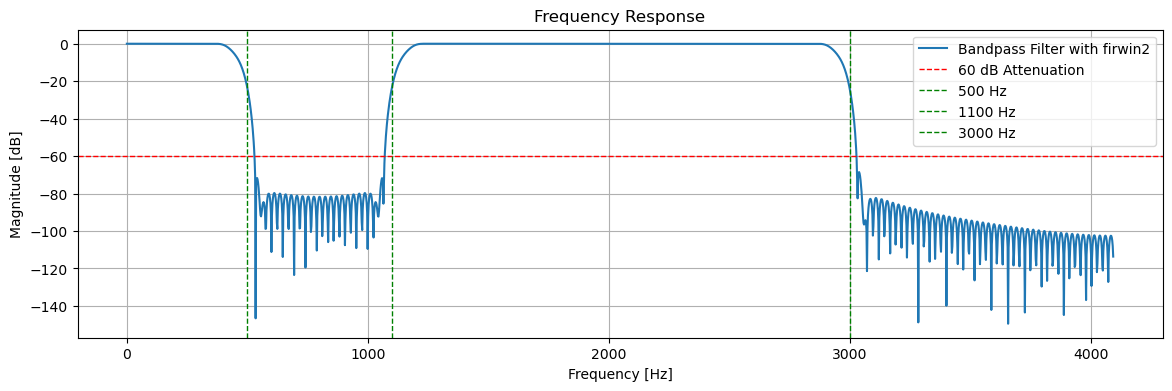

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin2, freqz

# Sampling frequency
Fs = 8192  

# Define the target frequency response
# Pass frequencies between 0-500 Hz and 1100-3000 Hz
target_freqs = [0, 400, 500, 1100, 1200, 2900, 3000, Fs/2]
target_response = [1, 1, 0, 0, 1, 1, 0, 0]  # 1 in passbands, 0 in stopbands

# Filter order
numtaps = 350  

# Design the FIR filter using firwin2
filter_taps = firwin2(numtaps, target_freqs, target_response, fs=Fs)

# Calculate the frequency response of the filter
w, h = freqz(filter_taps, worN=2000, fs=Fs)

# Plot the frequency response
plt.figure(figsize=(14, 4))
plt.plot(w, 20 * np.log10(abs(h)), label="Bandpass Filter with firwin2")
plt.title('Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axhline(-60, color='red', linestyle='--', label="60 dB Attenuation", linewidth=1)
plt.axvline(500, color='green', linestyle='--', label="500 Hz", linewidth=1)
plt.axvline(1100, color='green', linestyle='--', label="1100 Hz", linewidth=1)
plt.axvline(3000, color='green', linestyle='--', label="3000 Hz", linewidth=1)
plt.legend()
plt.show()
